## Report: act_report

The main motive of data analysis is to gain insight into the data such that future projection can be done with an appreciable level of accuracy. After cleaning the data given it was stored as 'twitter_archive_master'. The following insights were looked for: 

1.  Ten top months with the highest favorite count

2.  Ten top months with the highest tweet count

3.  Influence of the day on the favourite count

4.  Finding the correlatiion between the Favorite and retweet counts

Here is the summary of the insights: 

Favorite count and retweet count has been found to reach their peak in June. This can be rationally attributed to the fact that dog festival normally occur at the period. Followed by this month is the month of January for favorite count and December for retweet count. While the third month for the counts is the reverse of their second months (December and January respectively). This must have been due to the fact that months, January and December, are festive periods filled with holidays

It was gathered from these insights that the day of the week that normally receive the highest favorite count is Saturday followed by Friday. This may be due to the fact that people will be less busy on these days (weekend). Therefore, it will be wise to target these days for tweet.

Also, as expected, the correlation relationship between favorite count and retweet count is positive and close to 1 (0.86). That is, the higher the favorite count, the higher the retweet count and vice versa and that this correlation is so strong.

However, the correlations between these features (favorite count and retweet count) with rating numerator and rating denominator are weak. They are positive for the former and negative for the later.

## Write funtion for the visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('twitter_archive_master.csv')

In [2]:
def barhplot(x, y, xlabel, title):
    plt.figure(figsize=  (14, 8))
    plt.barh(x, y, align = 'center')
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel, fontsize = 18)
    plt.title(title, fontsize = 18)
    plt.show();


## Ten top months with the highest favorite count

In [3]:
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'favorite_count', 'month']].head(10)
top_10

,tweet_id,source,favorite_count,month
836,744234799360020481,http://twitter.com/download/iphone,144897,June
319,822872901745569793,http://twitter.com/download/iphone,124127,January
422,807106840509214720,http://twitter.com/download/iphone,111710,December
110,866450705531457537,http://twitter.com/download/iphone,108924,May
871,739238157791694849,http://twitter.com/download/iphone,107253,June
59,879415818425184262,http://twitter.com/download/iphone,92885,June
348,819004803107983360,http://twitter.com/download/iphone,82714,January
138,859196978902773760,http://twitter.com/download/iphone,80607,May
94,870374049280663552,http://twitter.com/download/iphone,73941,June
1485,678399652199309312,http://twitter.com/download/iphone,73528,December


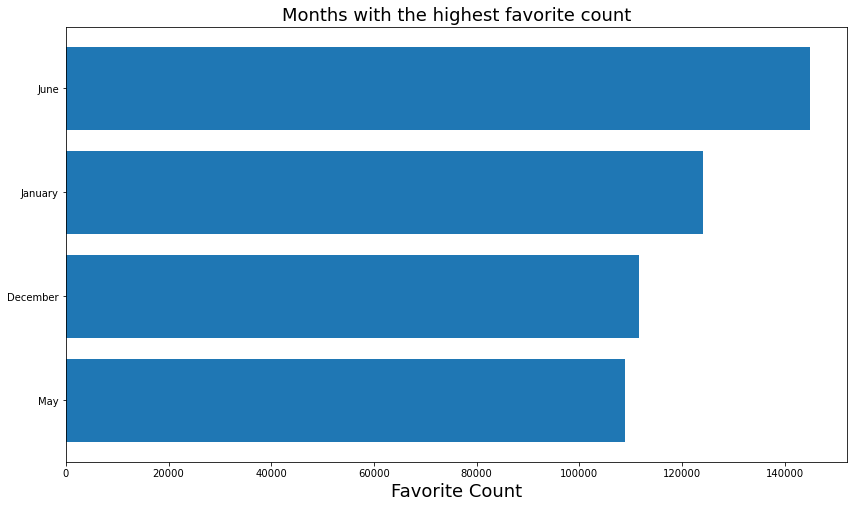

In [4]:
barhplot(top_10.month, top_10.favorite_count, "Favorite Count", "Months with the highest favorite count")

## Ten top months with the highest Retweet count

In [5]:
top = df.sort_values(by = 'retweet_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'retweet_count', 'month']].head(10)
top_10.head()

,tweet_id,source,text,retweet_count,month
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,70742,June
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,52908,June
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,51687,December
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,39926,January
59,879415818425184262,http://twitter.com/download/iphone,This is Duddles. He did an attempt. 13/10 some...,37457,June


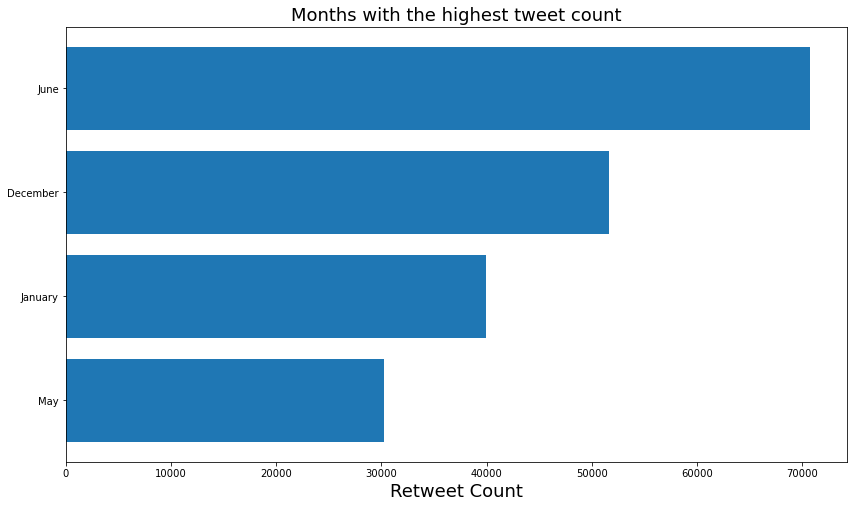

In [6]:
barhplot(top_10.month, top_10.retweet_count, "Retweet Count", "Months with the highest tweet count")

Favorite count and retweet count has been found to reach their peak in June. This can be rationally attributed to the fact that dog festival normally occur at the period. Followed by this month is the month of January for favorite count and December for retweet count. While the third month for the counts is the reverse of their second months (December and January respectively). This must have been due to the fact that months, January and December, are festive periods filled with holidays.

## Influence of the day on the favourite_count

In [7]:
top = df.groupby(by = 'day')
top = df.sort_values(by = 'favorite_count', ascending = False)
top_10 = top[['tweet_id', 'source', 'text', 'favorite_count', 'day']].head(10)
top_10.head()

,tweet_id,source,text,favorite_count,day
836,744234799360020481,http://twitter.com/download/iphone,Here's a doggo realizing you can stand in a po...,144897,Saturday
319,822872901745569793,http://twitter.com/download/iphone,Here's a super supportive puppo participating ...,124127,Saturday
422,807106840509214720,http://twitter.com/download/iphone,This is Stephan. He just wants to help. 13/10 ...,111710,Friday
110,866450705531457537,http://twitter.com/download/iphone,This is Jamesy. He gives a kiss to every other...,108924,Monday
871,739238157791694849,http://twitter.com/download/iphone,Here's a doggo blowing bubbles. It's downright...,107253,Saturday


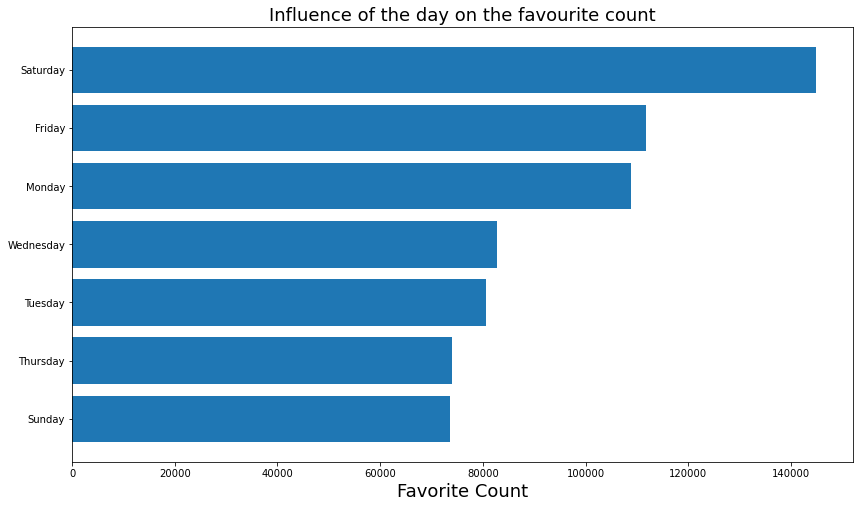

In [8]:
barhplot(top_10.day, top_10.favorite_count, "Favorite Count", "Influence of the day on the favourite count")

It was gathered from these insights that the day of the week that normally receive the highest favorite count is Saturday followed by Friday. This may be due to the fact that people will be less busy on these days (weekend). Therefore, it will be wise to target these days for tweet.

## Finding the correlatiion between the Favorite and retweet counts

In [9]:
df.favorite_count.corr(df.retweet_count)

0.8610297825285088

## Visualization

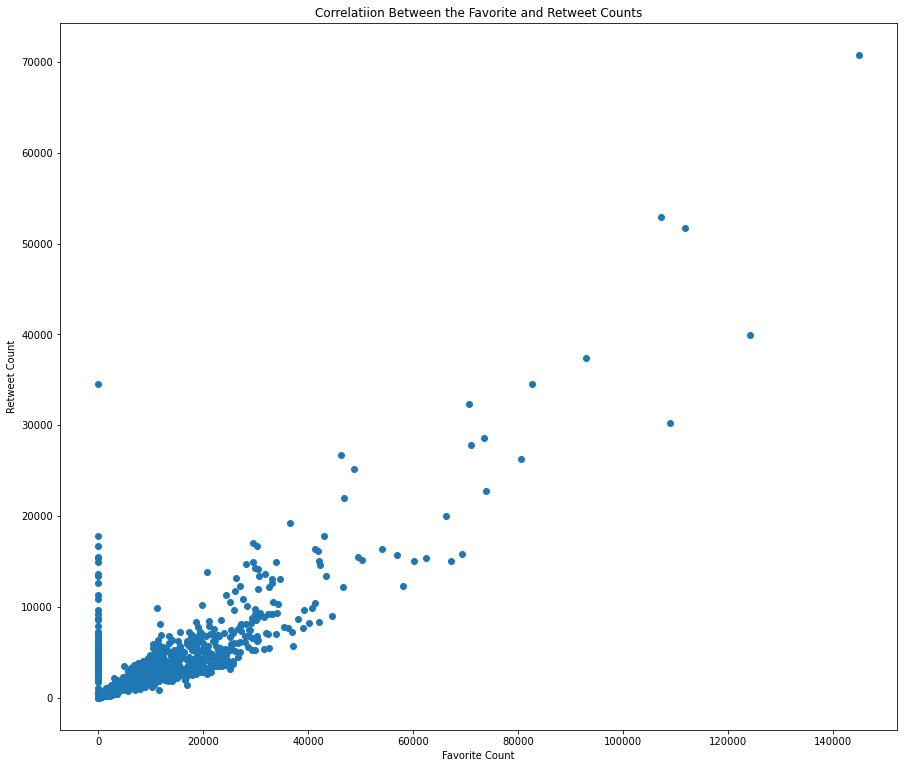

In [10]:
plt.figure(figsize=(15, 13))
ax = plt.axes()
ax.scatter(df.favorite_count, df.retweet_count)

ax.set_xlabel('Favorite Count')
ax.set_ylabel('Retweet Count')
ax.set_title('Correlatiion Between the Favorite and Retweet Counts')

ax.axis('tight')

plt.show()

Also, as expected, the correlation relationship between favorite count and retweet count is positive and close to 1 (0.86). That is, the higher the favorite count, the higher the retweet count and vice versa and that this correlation is so strong.

In [11]:
df.favorite_count.corr(df.rating_numerator)

0.01605740884435733

In [12]:
df.favorite_count.corr(df.rating_denominator)

-0.025221199482836947

In [13]:
df.retweet_count.corr(df.rating_numerator)

0.0176592027462129

In [14]:
df.retweet_count.corr(df.rating_denominator)

-0.021366610584886505

However, the correlations between these features (favorite count and retweet count) with rating numerator and rating denominator are weak. They are positive for the former and negativefor the later.